# Projeto 2 - Ciência dos Dados

João Otávio Gentil Palma

# Prevendo o rendimento médio de fazendas pelo Brasil
___
## Introdução

### O Objetivo

O objetivo do projeto 2 de Ciência dos Dados é **prever**, por meio de algumas variáveis $features$, **uma variável $target$**. Em termos mais comuns, isso significa dizer que, com base em variáveis que explicam ou afetam um fenômeno, ou seja, que têm correlação com ele, vamos prever esse fenômeno, seja ele um número (variável quantitativa) ou classificação (variável qualitativa).

### Rendimento médio de uma plantação

No caso do tema específico do projeto, vamos **prever o rendimento médio de uma safra (colheita)** com base em vários fatores que se correlacionam com o preço, como a localização, produto, área plantada, área colhida, quantidade produzida, valor_producao, entre outros.

### Base de dados

In [76]:
import pandas as pd
import seaborn as sns

import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from pandas.plotting import scatter_matrix

from sklearn import tree

# Filtros 
Em seguida filtraremos o dataframe utilizado para trabalharmos com apenas as 'features' desejadas.

In [2]:
# Explorando df de lavouras temporarias

dados_temporario = pd.read_csv("dados_lavouras_temporario_na.csv")
dados_temporario = dados_temporario.drop(columns=['Unnamed: 0', 'id_municipio'])
dados_temporario = dados_temporario.dropna()
dados_temporario['Tipo'] = 'Temporário'
dados_temporario

# Explorando df de lavouras permanentes

dados_permanente = pd.read_csv("dados_lavouras_permanente_na.csv")
dados_permanente = dados_permanente.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'id_municipio'])
dados_permanente['Tipo'] = 'Permanente'
dados_permanente


# Concatenando ambas as planilhas
dados_lavouras = pd.concat([dados_permanente, dados_temporario], axis=0)
dados_lavouras = dados_lavouras.dropna()
dados_lavouras

,ano,sigla_uf,produto,area_plantada,area_colhida,quantidade_produzida,rendimento_medio,valor_producao,prop_area_plantada,prop_area_colhida,prop_valor_producao,Tipo
0,2007,BA,Manga,85.0,85.0,340.0,4000.0,88.0,11.02,11.02,8.55,Permanente
1,2007,BA,Sisal ou agave (fibra),60.0,60.0,60.0,1000.0,54.0,0.75,0.76,0.28,Permanente
2,2007,BA,Coco-da-baía,19.0,15.0,75.0,5000.0,30.0,18.63,15.31,10.49,Permanente
3,2007,BA,Maracujá,3.0,3.0,45.0,15000.0,9.0,0.51,0.51,0.16,Permanente
4,2007,BA,Limão,5.0,5.0,78.0,15600.0,32.0,0.11,0.12,0.23,Permanente
...,...,...,...,...,...,...,...,...,...,...,...,...
8444613,2018,MG,Tomate,5.0,5.0,290.0,58000.0,411.0,0.03,0.03,0.50,Temporário
8444618,2018,MG,Tomate,1.0,1.0,35.0,35000.0,47.0,0.11,0.11,0.77,Temporário
8444620,2018,MG,Feijão (em grão),30.0,30.0,24.0,800.0,72.0,10.27,10.27,6.99,Temporário
8444621,2018,MG,Sorgo (em grão),3.0,3.0,9.0,3000.0,3.0,1.03,1.03,0.29,Temporário


In [3]:
#dados_lavouras['ano'].value_counts()

In [4]:
# Removendo as linhas dos anos 1994 ou antes, pois a moeda era diferente

dados_lavouras = dados_lavouras.drop(dados_lavouras[dados_lavouras.ano.isin([1991, 1992, 1989, 1993])].index).reset_index(drop=True)

Até o momento, foi feito um filtro nos dados da planilha para que ela fique masi prática e fácil de trabalhar

Tirei anos anteriores a 1994, pois a moeda que circulava era diferente

In [5]:
dados_lavouras

,ano,sigla_uf,produto,area_plantada,area_colhida,quantidade_produzida,rendimento_medio,valor_producao,prop_area_plantada,prop_area_colhida,prop_valor_producao,Tipo
0,2007,BA,Manga,85.0,85.0,340.0,4000.0,88.0,11.02,11.02,8.55,Permanente
1,2007,BA,Sisal ou agave (fibra),60.0,60.0,60.0,1000.0,54.0,0.75,0.76,0.28,Permanente
2,2007,BA,Coco-da-baía,19.0,15.0,75.0,5000.0,30.0,18.63,15.31,10.49,Permanente
3,2007,BA,Maracujá,3.0,3.0,45.0,15000.0,9.0,0.51,0.51,0.16,Permanente
4,2007,BA,Limão,5.0,5.0,78.0,15600.0,32.0,0.11,0.12,0.23,Permanente
...,...,...,...,...,...,...,...,...,...,...,...,...
1650072,2018,MG,Tomate,5.0,5.0,290.0,58000.0,411.0,0.03,0.03,0.50,Temporário
1650073,2018,MG,Tomate,1.0,1.0,35.0,35000.0,47.0,0.11,0.11,0.77,Temporário
1650074,2018,MG,Feijão (em grão),30.0,30.0,24.0,800.0,72.0,10.27,10.27,6.99,Temporário
1650075,2018,MG,Sorgo (em grão),3.0,3.0,9.0,3000.0,3.0,1.03,1.03,0.29,Temporário


In [6]:
# Analisando a relação entre as variáveis

# sns.pairplot(dados_lavouras, height=1.5);
dados_lavouras.corr()

,ano,area_plantada,area_colhida,quantidade_produzida,rendimento_medio,valor_producao,prop_area_plantada,prop_area_colhida,prop_valor_producao
ano,1.000000,0.030341,0.030757,0.030241,-0.110830,0.100294,0.041741,0.042519,0.040893
area_plantada,0.030341,1.000000,0.999091,0.388486,-0.011173,0.812540,0.207208,0.206351,0.189787
area_colhida,0.030757,0.999091,1.000000,0.388909,-0.010258,0.814307,0.205157,0.205084,0.189369
quantidade_produzida,0.030241,0.388486,0.388909,1.000000,0.207042,0.442953,0.190248,0.189675,0.202889
rendimento_medio,-0.110830,-0.011173,-0.010258,0.207042,1.000000,0.034347,-0.042753,-0.041857,0.070652
valor_producao,0.100294,0.812540,0.814307,0.442953,0.034347,1.000000,0.193109,0.192795,0.212513
prop_area_plantada,0.041741,0.207208,0.205157,0.190248,-0.042753,0.193109,1.000000,0.994111,0.862252
prop_area_colhida,0.042519,0.206351,0.205084,0.189675,-0.041857,0.192795,0.994111,1.000000,0.869810
prop_valor_producao,0.040893,0.189787,0.189369,0.202889,0.070652,0.212513,0.862252,0.869810,1.000000


In [7]:
norte = ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC']
nordeste = ['MA', 'PI', 'CE', 'RN', 'PE', 'PB', 'SE', 'AL', 'BA']
centro_oeste = ['MT', 'MS', 'GO']
sudeste = ['SP', 'RJ', 'ES', 'MG']
sul = ['PR', 'RS', 'SC']
def func_regiao(sigla):
    if sigla in norte:
        return 'Norte'
    elif sigla in nordeste:
        return 'Nordeste'
    elif sigla in centro_oeste:
        return 'Centro-oeste'
    elif sigla in sudeste:
        return 'Sudeste'
    else:
        return 'Sul'
        
dados_lavouras['regiao'] = dados_lavouras['sigla_uf'].apply(func_regiao)

In [8]:
dados_lavouras = dados_lavouras[['ano', 'sigla_uf','regiao', 'produto', 'area_plantada', 'area_colhida',
       'quantidade_produzida', 'rendimento_medio', 'valor_producao',
       'prop_area_plantada', 'prop_area_colhida', 'prop_valor_producao',
       'Tipo']]

#dados_lavouras.loc[dados_lavouras['regiao'] == 'Sudeste'].corr()

# Mudança de data frame
Para que o trabalho seja mais prático e o pandas consiga trbalhar idem, foi necessário separar o df em regiões.
Com o df filtrado da devida maneira, vamos trabalhar somente com a região sudeste.

In [9]:
dados_lavouras_sudeste = dados_lavouras.loc[dados_lavouras['regiao'] == 'Sudeste']

dados_lavouras_sudeste

,ano,sigla_uf,regiao,produto,area_plantada,area_colhida,quantidade_produzida,rendimento_medio,valor_producao,prop_area_plantada,prop_area_colhida,prop_valor_producao,Tipo
25,1998,RJ,Sudeste,Café (em grão) Total,1.0,1.0,1.0,1000.0,3.0,3.13,3.13,1.96,Permanente
45,2001,ES,Sudeste,Goiaba,1.0,1.0,20.0,20000.0,14.0,0.01,0.01,0.10,Permanente
46,2001,ES,Sudeste,Manga,4.0,4.0,84.0,21000.0,42.0,1.33,1.33,14.05,Permanente
47,2001,ES,Sudeste,Maracujá,7.0,7.0,245.0,35000.0,121.0,0.06,0.06,0.76,Permanente
48,2001,ES,Sudeste,Manga,2.0,2.0,32.0,16000.0,16.0,0.01,0.01,0.07,Permanente
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1650072,2018,MG,Sudeste,Tomate,5.0,5.0,290.0,58000.0,411.0,0.03,0.03,0.50,Temporário
1650073,2018,MG,Sudeste,Tomate,1.0,1.0,35.0,35000.0,47.0,0.11,0.11,0.77,Temporário
1650074,2018,MG,Sudeste,Feijão (em grão),30.0,30.0,24.0,800.0,72.0,10.27,10.27,6.99,Temporário
1650075,2018,MG,Sudeste,Sorgo (em grão),3.0,3.0,9.0,3000.0,3.0,1.03,1.03,0.29,Temporário


## Dummy's 

Como as 'features' de bairro e tipo do quarto são strings utilizaremos a técnica de dummy's para tranformá-los em números

In [36]:
ano = dados_lavouras_sudeste['ano']
sigla_uf = dados_lavouras_sudeste['sigla_uf']
produto = dados_lavouras_sudeste['produto']
produto_dummy = pd.get_dummies(produto)
area_plantada = dados_lavouras_sudeste['area_plantada']
area_colhida = dados_lavouras_sudeste['area_colhida']
quantidade_produzida = dados_lavouras_sudeste['quantidade_produzida']
rendimento_medio = dados_lavouras_sudeste['rendimento_medio']
valor_producao = dados_lavouras_sudeste['valor_producao']
prop_area_plantada = dados_lavouras_sudeste['prop_area_plantada']
prop_area_colhida = dados_lavouras_sudeste['prop_area_colhida']
prop_valor_producao = dados_lavouras_sudeste['prop_valor_producao']
tipo = dados_lavouras_sudeste['Tipo']
tipo_dummy = pd.get_dummies(tipo)

# Análise exploratória

In [42]:
corr = dados_lavouras_sudeste.corr()
corr

,ano,area_plantada,area_colhida,quantidade_produzida,rendimento_medio,valor_producao,prop_area_plantada,prop_area_colhida,prop_valor_producao
ano,1.000000,0.043932,0.043413,0.035176,-0.110303,0.151149,0.071284,0.071434,0.068816
area_plantada,0.043932,1.000000,0.999181,0.736261,0.105996,0.768746,0.354975,0.354728,0.336166
area_colhida,0.043413,0.999181,1.000000,0.736346,0.106227,0.769519,0.354365,0.354633,0.336371
quantidade_produzida,0.035176,0.736261,0.736346,1.000000,0.251422,0.610241,0.251133,0.251225,0.265859
rendimento_medio,-0.110303,0.105996,0.106227,0.251422,1.000000,0.107942,-0.003588,-0.002434,0.112955
valor_producao,0.151149,0.768746,0.769519,0.610241,0.107942,1.000000,0.339656,0.339909,0.362377
prop_area_plantada,0.071284,0.354975,0.354365,0.251133,-0.003588,0.339656,1.000000,0.998515,0.896487
prop_area_colhida,0.071434,0.354728,0.354633,0.251225,-0.002434,0.339909,0.998515,1.000000,0.899215
prop_valor_producao,0.068816,0.336166,0.336371,0.265859,0.112955,0.362377,0.896487,0.899215,1.000000


# Gráficos de correlações

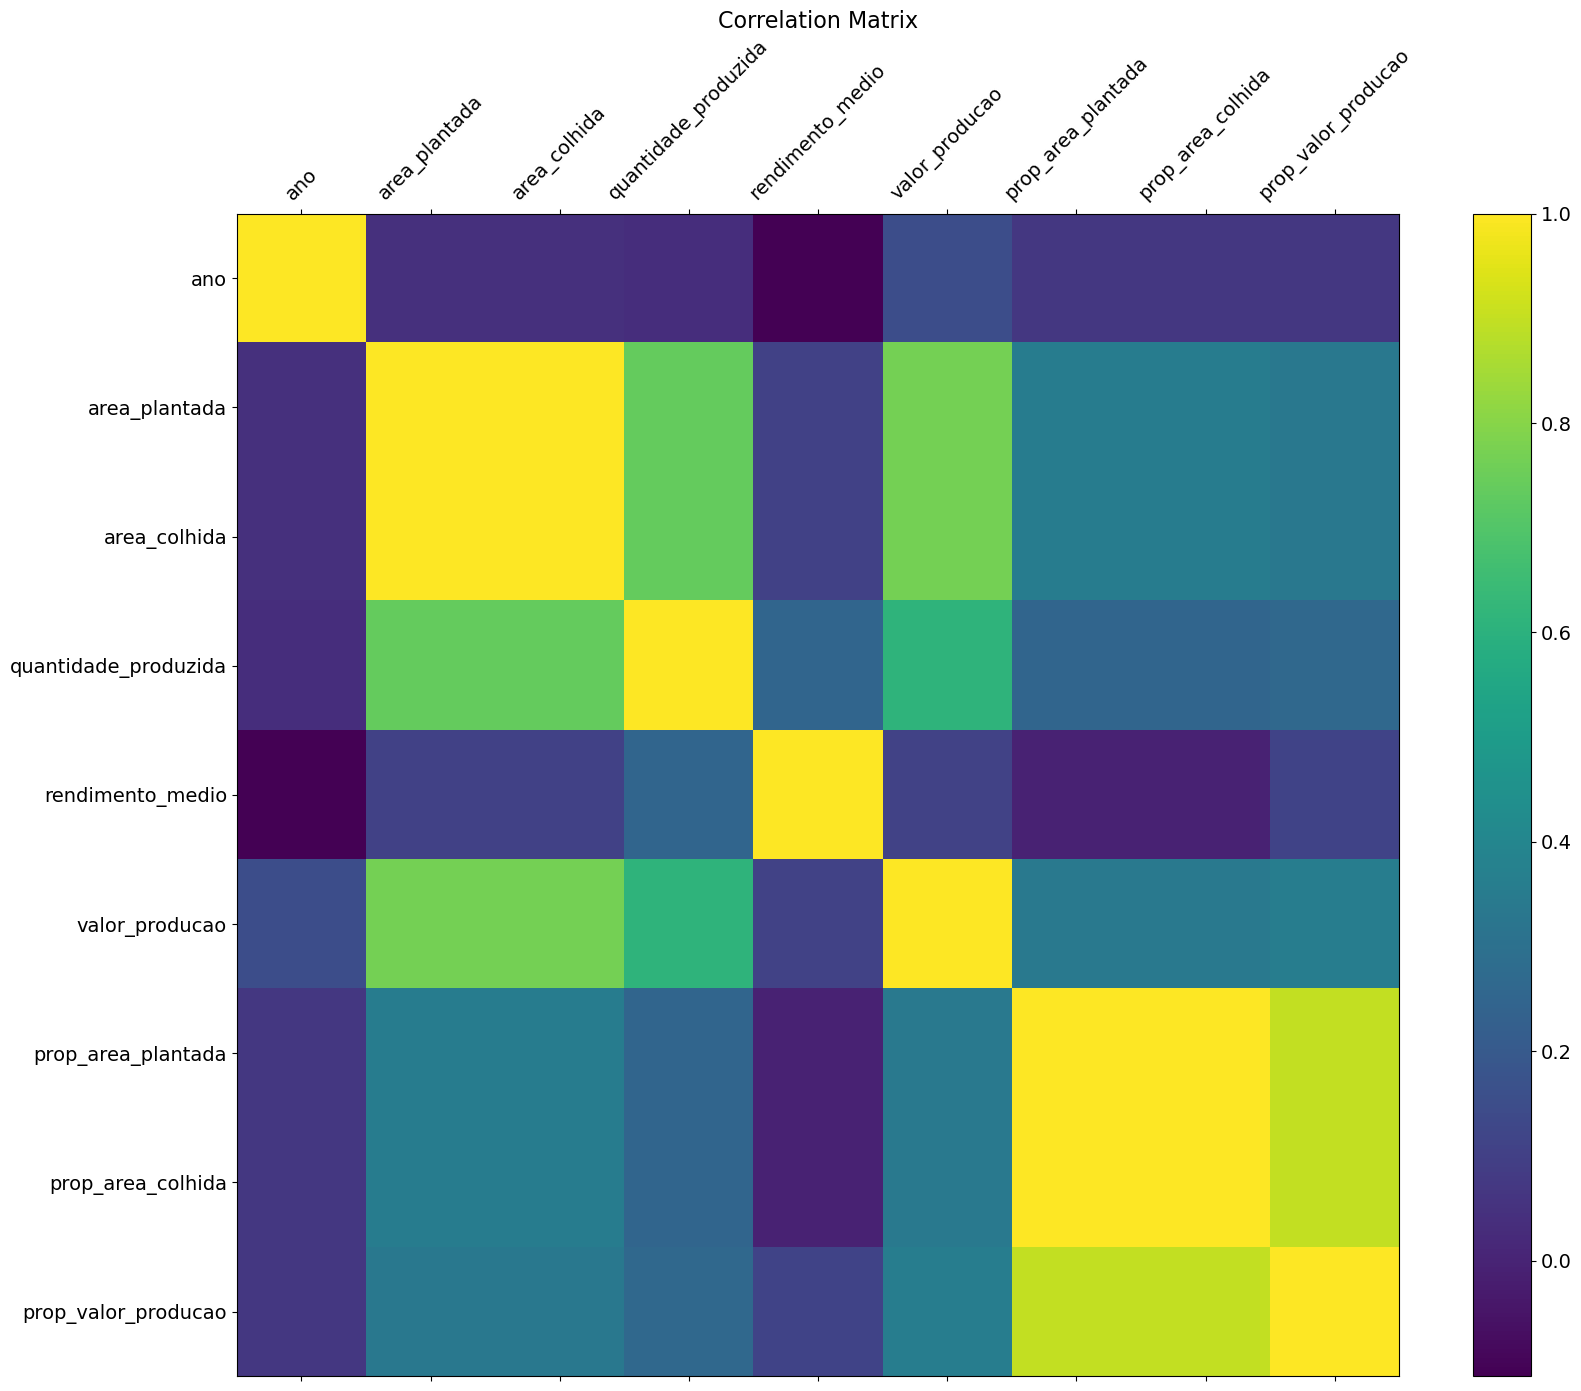

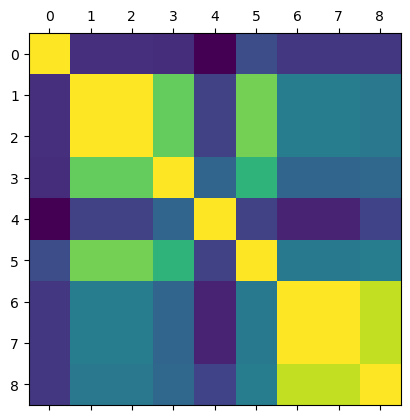

In [47]:
plt.matshow(dados_lavouras_sudeste.corr())
plt.show()

In [44]:
corr.style.background_gradient(cmap='coolwarm', axis=None)

,ano,area_plantada,area_colhida,quantidade_produzida,rendimento_medio,valor_producao,prop_area_plantada,prop_area_colhida,prop_valor_producao
ano,1.000000,0.043932,0.043413,0.035176,-0.110303,0.151149,0.071284,0.071434,0.068816
area_plantada,0.043932,1.000000,0.999181,0.736261,0.105996,0.768746,0.354975,0.354728,0.336166
area_colhida,0.043413,0.999181,1.000000,0.736346,0.106227,0.769519,0.354365,0.354633,0.336371
quantidade_produzida,0.035176,0.736261,0.736346,1.000000,0.251422,0.610241,0.251133,0.251225,0.265859
rendimento_medio,-0.110303,0.105996,0.106227,0.251422,1.000000,0.107942,-0.003588,-0.002434,0.112955
valor_producao,0.151149,0.768746,0.769519,0.610241,0.107942,1.000000,0.339656,0.339909,0.362377
prop_area_plantada,0.071284,0.354975,0.354365,0.251133,-0.003588,0.339656,1.000000,0.998515,0.896487
prop_area_colhida,0.071434,0.354728,0.354633,0.251225,-0.002434,0.339909,0.998515,1.000000,0.899215
prop_valor_producao,0.068816,0.336166,0.336371,0.265859,0.112955,0.362377,0.896487,0.899215,1.000000


In [30]:
dados_y = dados_lavouras_sudeste['rendimento_medio']
dados_x = dados_lavouras_sudeste[['area_plantada', 'area_colhida', 'quantidade_produzida', 'valor_producao', 'prop_area_plantada', 'prop_area_colhida']]

In [60]:
dados_y.describe()

count    436831.000000
mean      18207.173790
std       29086.807198
min           3.000000
25%        1800.000000
50%        7176.000000
75%       21000.000000
max      850000.000000
Name: rendimento_medio, dtype: float64

In [31]:
#sns.pairplot(dados_lavouras_sudeste, x_vars = ['area_colhida'], y_vars = ['rendimento_medio'], hue='produto');

sns.pairplot(dados_lavouras_sudeste.head(100), height=1.5)

In [15]:
def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

results = regress(dados_x,dados_y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       rendimento_medio   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     6265.
Date:                Tue, 23 May 2023   Prob (F-statistic):               0.00
Time:                        15:38:22   Log-Likelihood:            -5.0916e+06
No. Observations:              436831   AIC:                         1.018e+07
Df Residuals:                  436824   BIC:                         1.018e+07
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.876e+04     51.580    363.771      0.000    1.87e+04    1.89e+04
area_plantada           -0.5898      0.325     -1.816      0.069      -1.226       0.047
area_colhida            -0.9806      0.326     -3.004      0.003      -1.620      -0.341
quantidade_produzida     0.0567      0.000    173.558      0.000       0.056       0.057
valor_producao           0.0655      0.005     13.673      0.000       0.056       0.075
prop_area_plantada    -418.2943     28.579    -14.636      0.000    -474.309    -362.279
prop_area_colhida      371.7959     28.580     13.009      0.000     315.780     427.811
==============================================================================
Omnibus:                   433538.412   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         44911732.607
Skew:                           4.673   Prob(JB):                         0.00
Kurtosis:                      51.787   Cond. No.                     2.37e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpretando os dados acima, nota-se que a regressão utilizada não foi a mais eficaz. Isso é evidente quando o valor do R-squared é distante de 1.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dados_x, dados_y, test_size=0.4, random_state=0)

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
import sklearn.metrics

regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, dados_x, dados_y, cv=10, scoring='neg_mean_absolute_error')

array([-185.41821071, -199.91210921, -194.04931247, -190.94917741,
       -138.9107166 ,  -80.25912636,  -77.46927104,  -79.40518203,
        -80.23214218,  -81.93624331])

In [64]:
cross_val_score(regressor, dados_x, dados_y, cv=10, scoring='r2')

array([0.99642379, 0.99304142, 0.99175453, 0.99296975, 0.99357751,
       0.99938726, 0.99947155, 0.99947149, 0.99946006, 0.99929902])

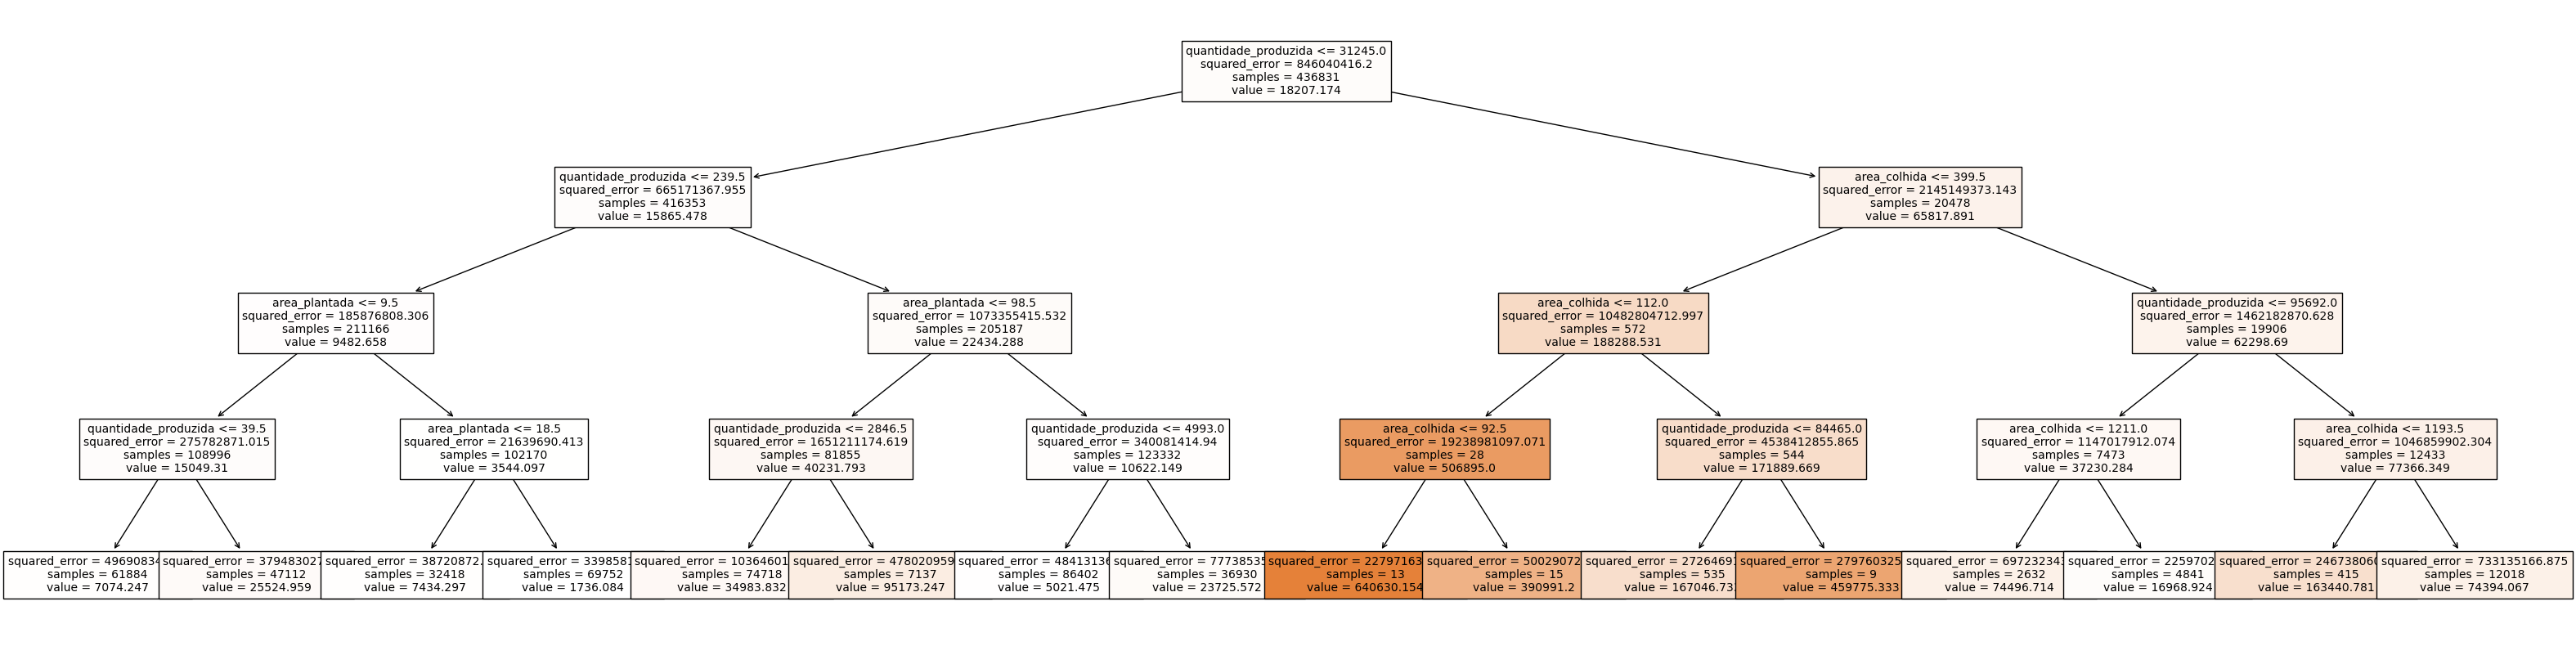

In [86]:
from sklearn import tree
clf = tree.DecisionTreeRegressor(max_depth=4)
clf = clf.fit(dados_x, dados_y)

plt.figure(figsize=(40,10))
tree.plot_tree(clf,fontsize=10,feature_names=dados_x.columns,filled=True)
plt.show()

In [87]:
clf.feature_importances_

array([0.27025316, 0.11202467, 0.61772217, 0.        , 0.        ,
       0.        ])

In [88]:
clf.feature_names_in_

array(['area_plantada', 'area_colhida', 'quantidade_produzida',
       'valor_producao', 'prop_area_plantada', 'prop_area_colhida'],
      dtype=object)

In [58]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we